In [1]:
import numpy as np
import matplotlib.pyplot as plt 


sigma=5.67E-8       # constant
S0=1000             # solar constant W/m**2
insul=20            # q' in equation 7 of WL82, this relates local albedo perturbations 
                    # to temperature perturbations

luminosity=np.arange(0.5,1.6,0.01) # range of luminosities over which we will loop, 
                                   # starting from low to high

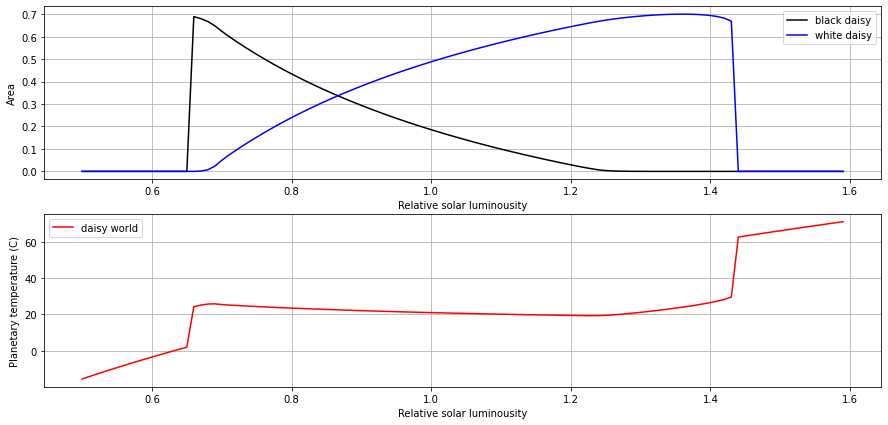

In [5]:
Td_idea = 22.5 + 273.15  # peak growth rate for daisies, temperature daisy idea
birth_rate_k = 0.003265  #constant
death_rate = 0.3         #constant 

def birth_rate(T):
    return max(1.0-birth_rate_k*(Td_idea-T)**2,0.0)
alb_w = 0.75            # white daisies 
alb_b = 0.25            # black daisies
alb_s = 0.5             # bare soil

# store arrays 
area_w_v = []
area_b_v = []
area_s_v = []
T_p_v = []
area_w = area_b = 0.01  # initial conditions
# now, time for loop over luminosity 

for iflux,flux in enumerate(luminosity):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_w = max(area_w,0.01)   # white daisies can't die out
    area_b = max(area_b,0.01)   # black daises neither  
    area_s = 1.0-area_w-area_b  # bare soil fraction
    it=0
    while it<100:  #100 number of iterations to allow daisies to equilibrate
        it+=1
        #weighted average albedo
        alb_p=area_w*alb_w+area_b*alb_b+area_s*alb_s
        #planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
        #local temperatures
        T_b=insul*(alb_p-alb_b)+T_p
        T_w=insul*(alb_p-alb_w)+T_p
        #birth rate
        birth_rate_b=birth_rate(T_b)
        birth_rate_w=birth_rate(T_w)
        #changing in daisy area
        area_b+=area_b*(birth_rate_b*area_s-death_rate)
        area_w+=area_w*(birth_rate_w*area_s-death_rate)
        # update areas
        area_s=1.0-area_b-area_w

    # store the value as append
    area_b_v.append(area_b)
    area_w_v.append(area_w)
    area_s_v.append(area_s)
    T_p_v.append(T_p)
    
plt.rcParams["figure.figsize"] = (15,7)    
    
fig,ax=plt.subplots(2,1)
ax[0].plot(luminosity,area_b_v,label='black daisy',color='black')
ax[0].plot(luminosity,area_w_v,label='white daisy',color='blue')
ax[0].set_xlabel('Relative solar luminousity')
ax[0].set_ylabel('Area')
ax[0].legend(loc="best")
ax[0].grid(True)

ax[1].plot(luminosity,np.array(T_p_v)-273.15, label='daisy world', color = 'red')
ax[1].set_xlabel('Relative solar luminousity')
ax[1].set_ylabel('Planetary temperature (C)')
ax[1].grid(True)
ax[1].legend(loc="best")
plt.show()